In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
spotify_df = pd.read_csv('/Users/anikasethi/Desktop/train_dataset.csv')
spotify_df = spotify_df.drop_duplicates(subset='id', keep='first')
train_features = ['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'time_signature']
spotify_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [4]:
spotify_df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

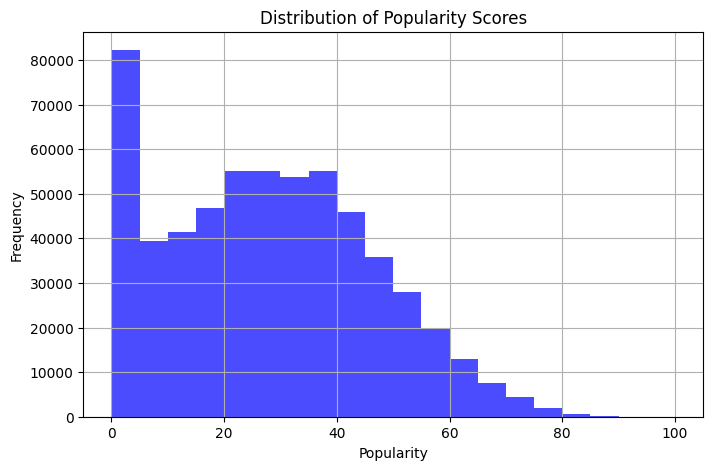

In [5]:
# Distribution of Popularity Scores
# Purpose: Understand how popular songs are distributed across the dataset.
# Plot: Histogram of the popularity column.
# Insights: This helps you see if most songs in the dataset are moderately popular, 
# have extreme popularity, or if the popularity is uniformly distributed.

plt.figure(figsize=(8, 5))
plt.hist(spotify_df['popularity'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid()
plt.show()


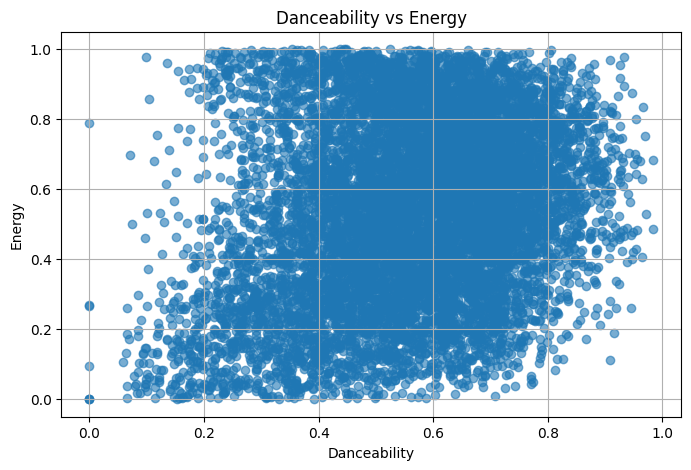

In [6]:
# Danceability vs. Energy Scatter Plot
# Purpose: Explore the relationship between danceability and energy to see how they correlate and group.
# Plot: Scatter plot with danceability on the x-axis and energy on the y-axis.
# Insights: This can reveal whether high-energy songs are also high in danceability or if there’s diversity in song features.

# picked a random sample of 10,000 datapoints

sample_df = spotify_df.sample(n=10000, random_state=42)  # Adjust sample size
plt.figure(figsize=(8, 5))
plt.scatter(sample_df['danceability'], sample_df['energy'], alpha=0.6)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid()
plt.show()


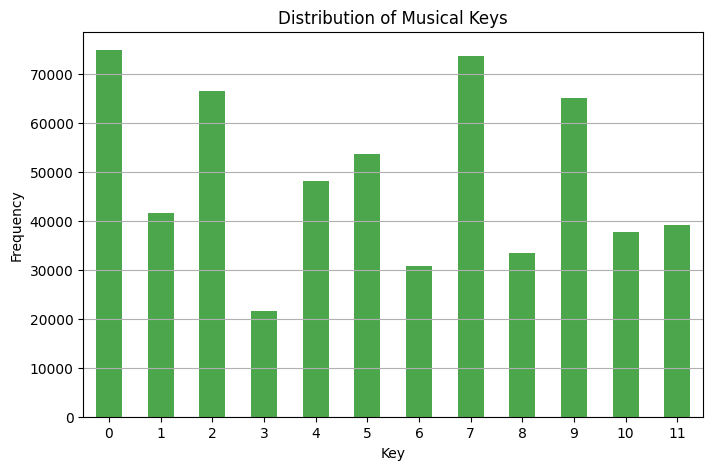

In [7]:
# Distribution of Key (Musical Keys)
# Purpose: Show the frequency of songs in each musical key (C, D, E, etc.).
# Plot: Bar plot of the key column (encoded as integers in your dataset).
# Insights: Helps identify the most common musical keys in the dataset and whether certain keys dominate.

plt.figure(figsize=(8, 5))
spotify_df['key'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Musical Keys')
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


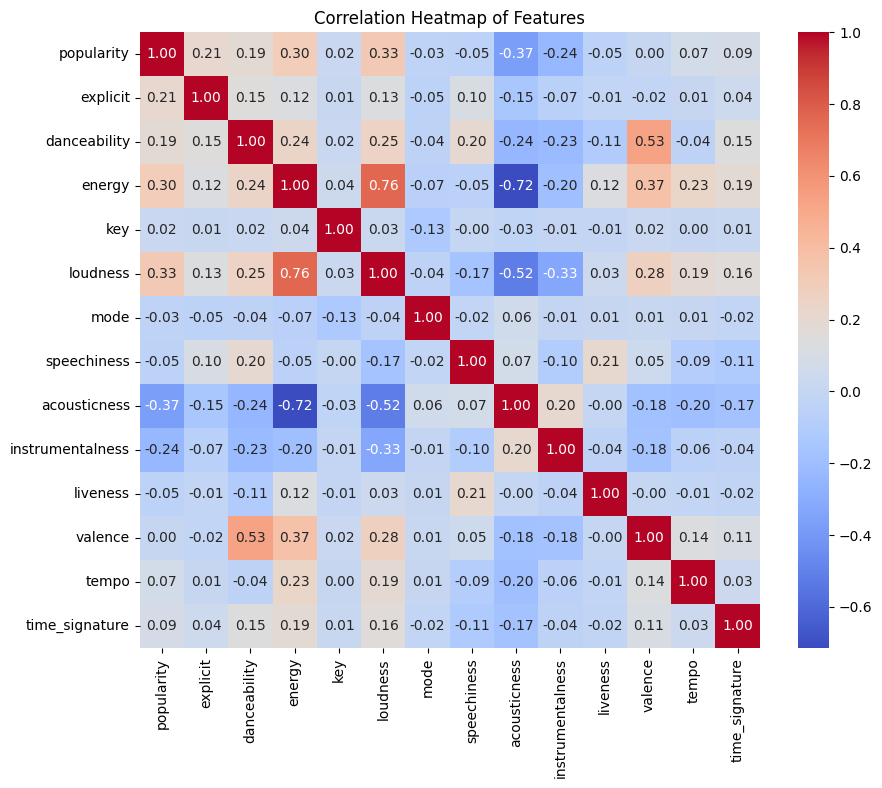

In [8]:
# Correlation Heatmap
# Purpose: Visualize the relationships between numerical features (e.g., danceability, energy, valence, etc.).
# Plot: Heatmap showing correlation coefficients between features.
# Insights: Reveals which features are highly correlated (positively or negatively), providing insight into 
# how song attributes are interrelated.

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(spotify_df[train_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


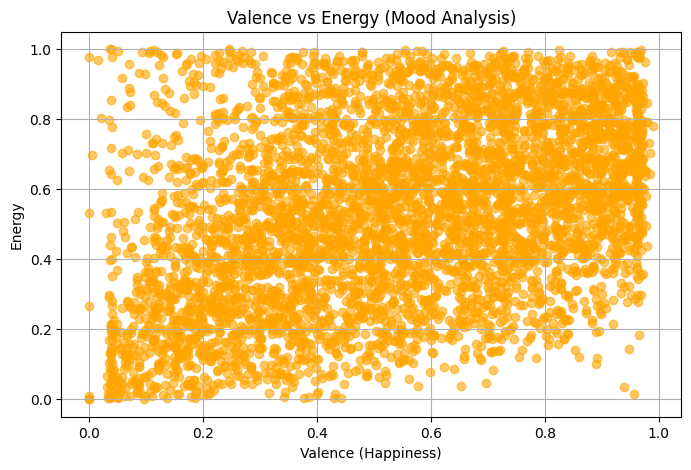

In [9]:
# Valence vs. Energy (Mood Analysis)
# Purpose: Analyze the mood of songs by comparing valence (happiness) and energy.
# Plot: Scatter plot with valence on the x-axis and energy on the y-axis.
# Insights: Identifies trends in song mood, such as whether happy songs tend to be more energetic.
# Reduce the number of points in the scatter plot
sample_df = spotify_df.sample(n=5000, random_state=42)

plt.figure(figsize=(8, 5))
plt.scatter(sample_df['valence'], sample_df['energy'], alpha=0.6, color='orange')
plt.title('Valence vs Energy (Mood Analysis)')
plt.xlabel('Valence (Happiness)')
plt.ylabel('Energy')
plt.grid()
plt.show()
